**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


## Import data (ASTARR, track)

In [2]:
ASSAY  = "KS91_K562_ASTARRseq"
FOLDER = "coverage"

### set file path
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "track.raw.Log2FC.MYC.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

dat_track_astarr = dat
print(dim(dat))
head(dat)

[1] 2000650       8


Chrom,Start,End,Input,Output,FC,Log2FC,pLog2FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8,126735901,126735902,0.03746935,0.002564858,0.06845216,-3.868760,-0.04937315
chr8,126735902,126735903,0.03746935,0.002564858,0.06845216,-3.868760,-0.04937315
chr8,126735903,126735904,0.03862336,0.002564858,0.06640691,-3.912523,-0.05097701
chr8,126735904,126735905,0.03820390,0.002564858,0.06713603,-3.896769,-0.05039424
chr8,126735905,126735906,0.03820390,0.002564858,0.06713603,-3.896769,-0.05039424
chr8,126735906,126735907,0.03820390,0.002564858,0.06713603,-3.896769,-0.05039424


## Import data

In [3]:
### set file path
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.peaks.MYC.FADS.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat_region = read_tsv(fpath, show_col_types = FALSE)
peaks = dat_region$Peak

print(dim(dat_region))
head(dat_region)

[1] 417   5


Chrom,Start,End,Peak,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC
chr8,126782925,126783318,chr8_126782925_126783318,MYC
chr8,126804776,126805825,chr8_126804776_126805825,MYC
chr8,126817018,126817490,chr8_126817018_126817490,MYC
chr8,126820465,126821393,chr8_126820465_126821393,MYC
chr8,126824093,126824987,chr8_126824093_126824987,MYC


## Plot

In [14]:
CHROM = "chr8"
START = 48780000
END   = 48810000
as.integer(END - START)

[1] 30000

In [15]:
### chr8:127700000-128100000
CHROM = "chr8"
START = 127700000
END   = 128200000
as.integer(END - START)

[1] 500000

In [16]:
dat_ant = dat_region %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
head(dat_ant)

Chrom,Start,End,Peak,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr8,127724090,127724405,chr8_127724090_127724405,MYC
chr8,127724898,127726838,chr8_127724898_127726838,MYC
chr8,127734044,127734352,chr8_127734044_127734352,MYC
chr8,127735036,127736676,chr8_127735036_127736676,MYC
chr8,127737396,127738924,chr8_127737396_127738924,MYC
chr8,127741710,127743482,chr8_127741710_127743482,MYC


[1]  226 3117


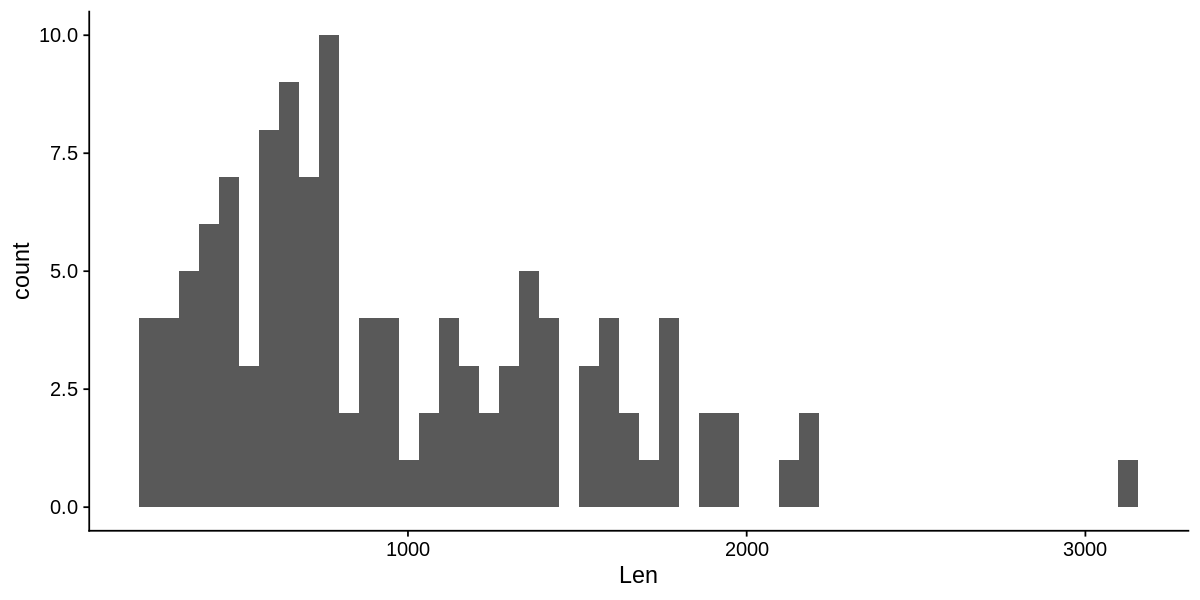

In [22]:
dat = dat_ant %>% mutate(Len = End - Start)
print(range(dat$Len))

gpt = ggplot(dat, aes(x=Len)) + geom_histogram(bins=50) + theme_cowplot()

options(repr.plot.height=5, repr.plot.width=10)
print(gpt)

[1]  226 3117


Warning message:
“Removed 93 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


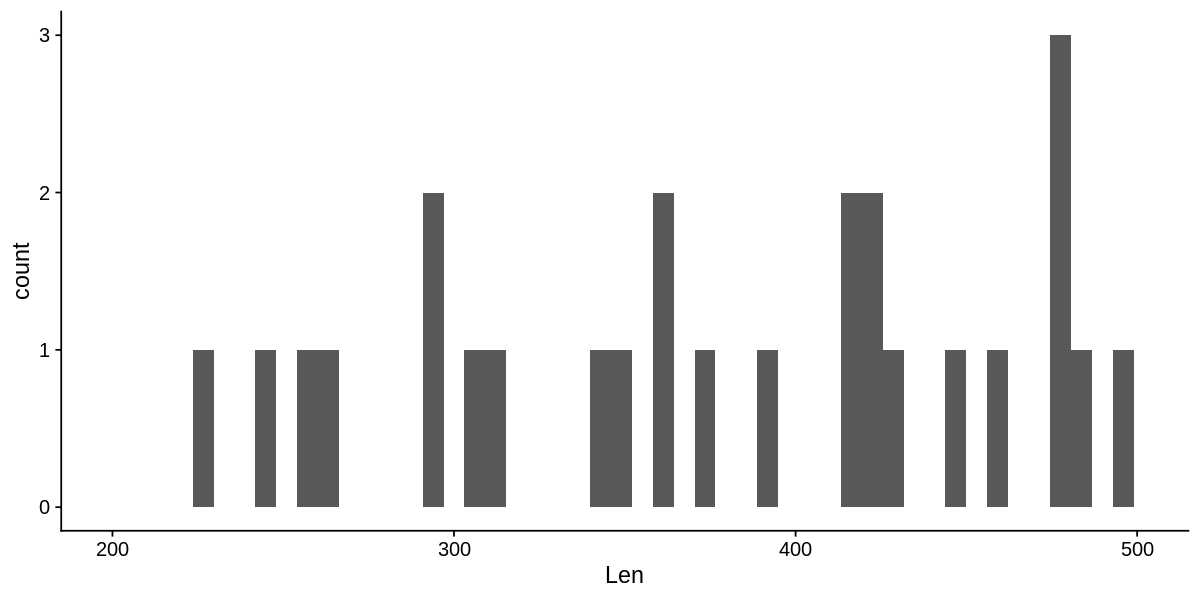

In [24]:
dat = dat_ant %>% mutate(Len = End - Start)
print(range(dat$Len))

gpt = ggplot(dat, aes(x=Len)) + geom_histogram(bins=50) + theme_cowplot() + xlim(200, 500)

options(repr.plot.height=5, repr.plot.width=10)
print(gpt)

In [17]:
dat = dat_track_astarr
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
head(dat)

Chrom,Start,End,Input,Output,FC,Log2FC,pLog2FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8,127700000,127700001,0.02536177,0.01509421,0.5951561,-0.7486600,-0.01451938
chr8,127700001,127700002,0.02578123,0.01509421,0.5854728,-0.7723258,-0.01510945
chr8,127700002,127700003,0.02216954,0.01509421,0.6808536,-0.5545836,-0.01002088
chr8,127700003,127700004,0.02216954,0.01509421,0.6808536,-0.5545836,-0.01002088
chr8,127700004,127700005,0.02216954,0.01509421,0.6808536,-0.5545836,-0.01002088
chr8,127700005,127700006,0.02216954,0.01509421,0.6808536,-0.5545836,-0.01002088


In [18]:
gp1 = ggplot() + geom_line(data=dat, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat, aes(x=Start, y=pLog2FC))

lst = list(gp1, gp2, gp3)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, color="grey50") +    
        geom_rect(
            data = dat_ant,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = "red",
            alpha=0.5) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

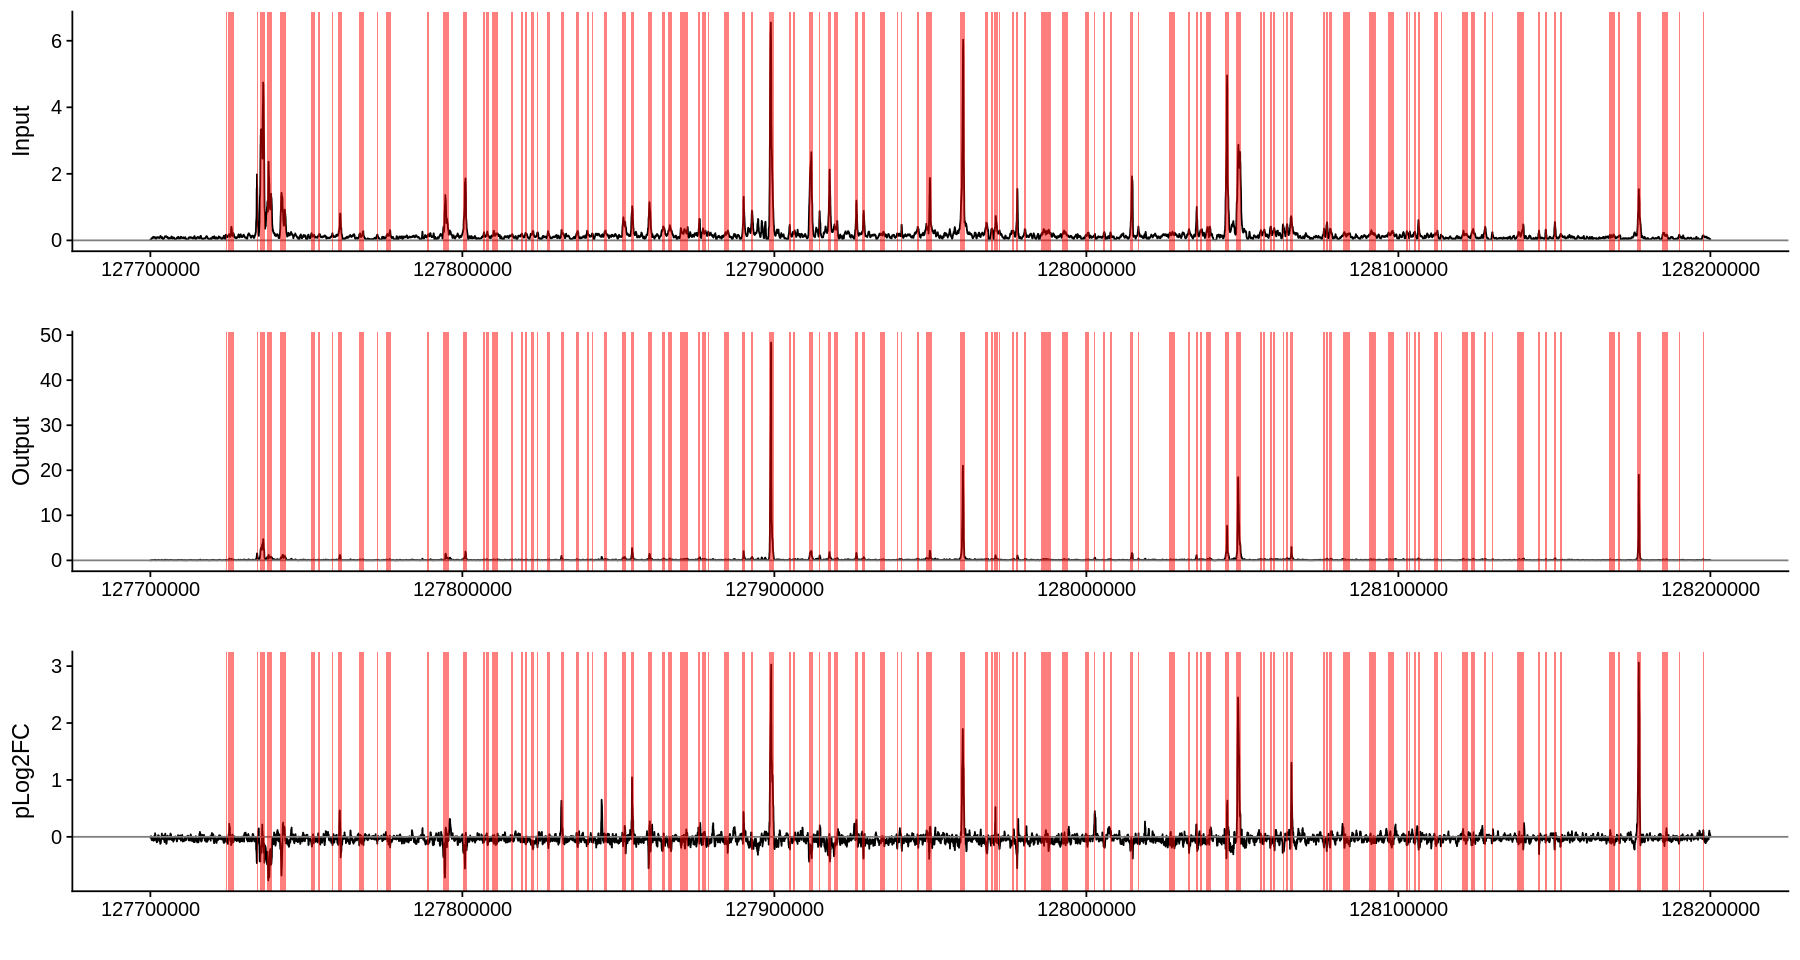

In [19]:
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)